# Análise dos Dados do Airbnb - *Los Angeles*

O [Airbnb](https://www.airbnb.com.br/) é reconhecido como uma das **maiores empresas de hospedagem em todo o mundo**, apesar de **não possuir nenhum hotel**. 

Sua plataforma inovadora conecta viajantes que desejam se hospedar a anfitriões que desejam alugar suas propriedades de maneira prática, oferecendo uma alternativa de hospedagem.

Desde sua fundação há 15 anos, a startup já **hospedou mais de 1 bilhão de pessoas** em diversos lugares do planeta, desafiando as redes de hotéis tradicionais.

O Airbnb tem uma iniciativa de disponibilizar dados do site para algumas das principais cidades do mundo, permitindo o download de uma grande quantidade de dados através do portal [Inside Airbnb](ttp://insideairbnb.com/get-the-data.html), o que possibilita o desenvolvimento de projetos e soluções de Data Science.

<center><img alt="Analisando Airbnb" width="25%" src="https://www.digital.ink/wp-content/uploads/airbnb_logo_detail.jpg"></center>

**Neste *notebook*, estaremos analisando os dados da cidade de Los Angeles, e vendo quais insights podem ser retirados a partir dos dados que temos .**

## Obtenção dos Dados


Todos os dados que seram utilizados neste notebook foram retirados a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, foi baixado o seguinte arquivo:

 - `listings.csv` - Summary information and metrics for listings in Los Angeles (good for visualisations).

In [ ]:
# importar os pacotes necessarios
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv('/content/drive/MyDrive/datasets/listings.csv')

**Dicionário das variáveis**

Esta etapa tem como finalidade criar uma consciência situacional 

* `id` - Número de id gerado para indentificar
* `name` - Nome da propriedade anunciada
* `host_id` - Número de id do proprietário(anfitrião) da propriedade
* `host_name` - Nome do anfitrião 
* `neighbourhood_group` - Esta coluna não ontém nenhum valor válido
* `neighbourhood` - Nome do bairro
* `latitude ` - Coordenada da latitude da propriedade
* `longitude` - Coordenada da longitude da propriedade
* `room_type` - Informa o tipo de quarto que é oferecido
* `price` - Preço para alugar o imóvel 
* `minimum_nights` - Quantidade mínima de noites para reservar 
* `number_od_reviews` - Número de reviews que a propriedade possui
* `last_review` - Data do último review
* `reviews_per_month` - Quantidade de reviews or mês
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião
* `availability_365` - Números de dias disponibilidade dentro de 365 dias 


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
#Verificar as 5 primeiras linhas do dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98301,-118.38607,Entire home/apt,115,30,2,2016-05-15,0.01,1,227,0,NaN
1,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,3008,Chas.,City of Los Angeles,Hollywood,34.09625,-118.34605,Private room,118,30,38,2022-11-29,0.37,2,239,5,NaN
2,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00440,-118.48095,Private room,179,7,24,2022-08-21,0.17,2,365,3,NaN
3,65467,A Luxury Home in Los Angeles,61864,Olivier,Other Cities,Culver City,34.02438,-118.38374,Private room,300,60,0,NaN,NaN,2,365,0,NaN
4,206662,"Hollywood & Hiking, 30 day minimum",33861,Kevin,City of Los Angeles,Hollywood Hills West,34.10420,-118.34748,Private room,46,30,95,2022-08-11,0.71,1,84,4,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**


- Dando continuidade na nossa análise, iremos indentificar a quantidade de entradas e de varíaveis. E por fim  verificar o tipo de dados que estão em cada coluna do dataset.

-  Uma informação importante é que este conjuntop de dados 

In [ ]:
# identificar o volume de dados do DataFrame
print(f'Entradas:\n{df.shape[0]}')
print(f'Variáveis:\n{df.shape[1]}')

print("***"*25)

# verificar as 5 primeiras entradas do dataset
df.dtypes

Entradas:
40438
Variáveis:
18
***************************************************************************


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.746229
reviews_per_month                 0.261759
last_review                       0.261759
host_name                         0.000049
name                              0.000049
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

O propósito dessa etapa é entender como as variáveis se organizam. Buscando fazer tal visualização iremos plotar um histograma.



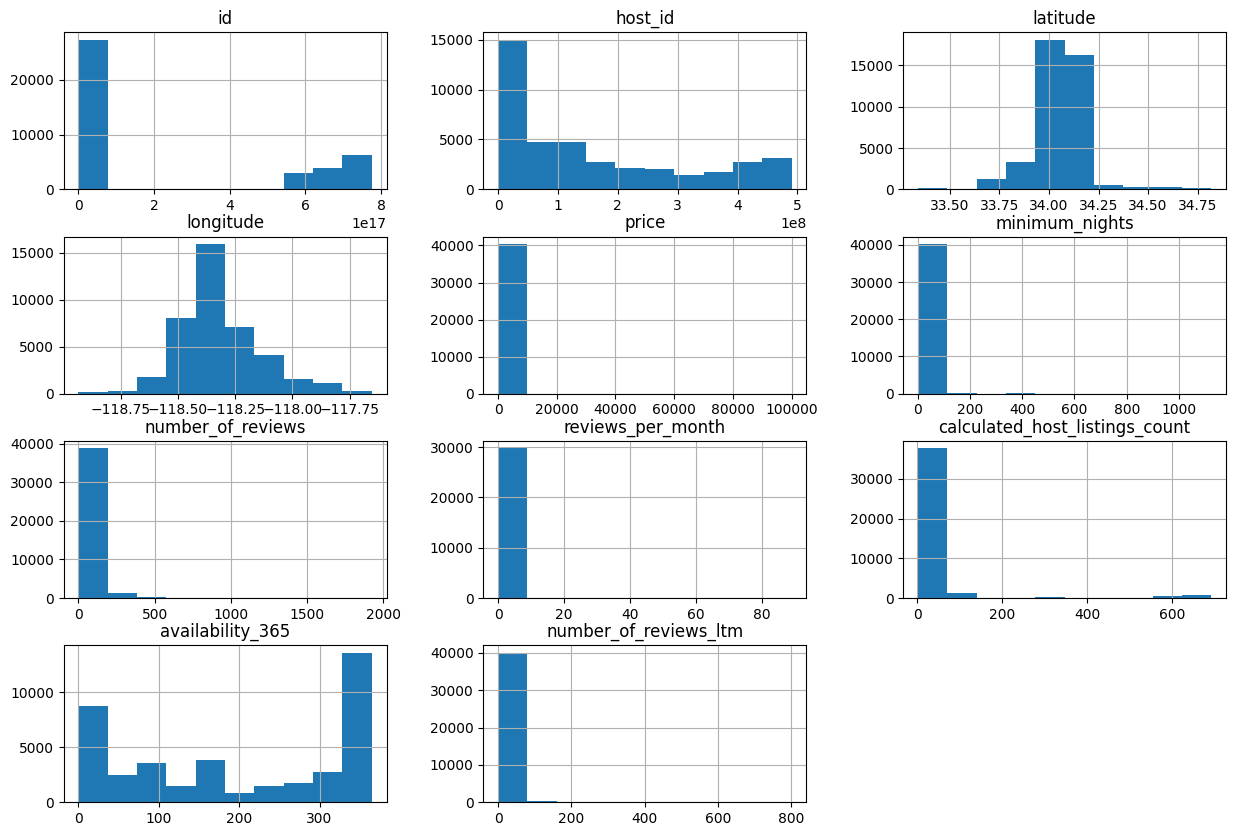

In [ ]:
# plotar o histograma das variáveis numéricas

df.hist(bins=10, figsize=(15,10));

Após realizar tal visualização, pude perceber que havia indícos de outilers em duas distribuições `price` e `minimum_nights`.

Dessa forma irei duas abordagens para comprovar os índicios desse dados, que no caso serão: 
- Um resumo estatístico utilizando a funão `describe`. 
- A plotagem de um `boxplot` ou gráfico de caixa.



In [ ]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,40438.000000,40438.000000,40438.000000,29853.000000,40438.000000,40438.000000
mean,279.449602,18.700653,33.562021,1.499085,32.550126,198.164969
std,1136.463147,30.973639,72.691163,1.866809,114.678176,142.646899
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,85.000000,2.000000,0.000000,0.240000,1.000000,62.000000
50%,138.000000,30.000000,5.000000,0.800000,2.000000,190.000000
75%,235.000000,30.000000,31.000000,2.250000,10.000000,348.000000
max,99999.000000,1124.000000,1924.000000,89.000000,693.000000,365.000000


Analisando o resumo estatístico percebemos que:

 - A variável `price`, tem 75% dos seus valores abaixo de 235, entretanto o seu  valor máximo é de 99999.

 - A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

Dado exposto resolvi por fazer a plotagem de um bloxpot para netender melhor o comportamento da nossa variável minimun_nights.

#### Boxplot para minimum_nights

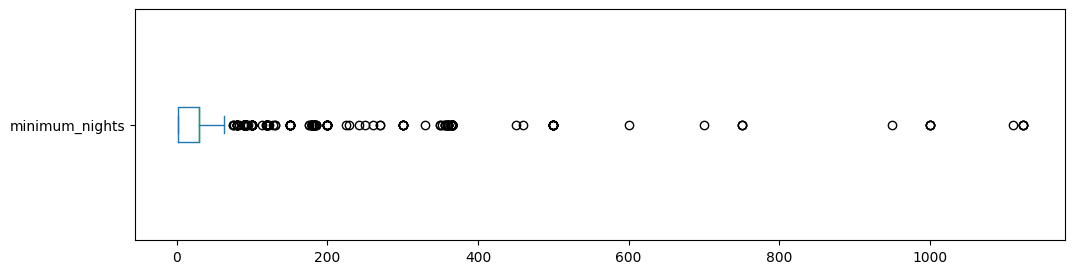

In [ ]:
df.minimum_nights.plot(kind='box', vert=False,figsize=(12,3))
plt.show()

In [ ]:
print("minimum_nights: valores acima de 30: ")
print(f"{len(df[df.minimum_nights > 30])} entradas")
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

minimum_nights: valores acima de 30: 
5144 entradas
12.7207%


Dado o esposto na visualização conseguimos perceber que existe um grande número de outliers. Pensando em obter mais valores sobre os outliers  resolvi contabilizá-los e logo abaixo do nosso bloxplot. 

Após fazer essa contabilização chegamos aos seguintes dados:

 - Que existem 5144 entradas em que a quantidade minima de noites `(minimum_night)` é maior que 30.

 - Isso corresponde a aproximadamente 12.72% dos dados desta variável.

#### Boxplot para price


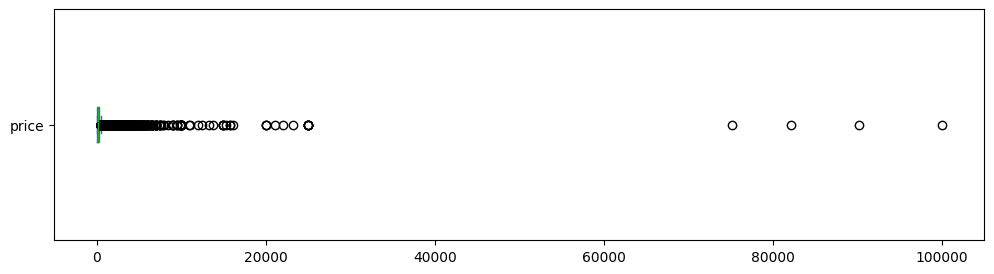

In [ ]:
df.price.plot(kind='box', vert = False,figsize=(12,3))
plt.show()

In [ ]:
print("price: valores acima de 2000: ")
print(f"{len(df[df.price > 2000])} entradas")
print("{:.4f}%".format((len(df[df.price > 2000]) / df.shape[0])*100))

price: valores acima de 2000: 
532 entradas
1.3156%


Nesse boxplot conseguimos ver que temos uma enorme quantidade de outiliers e alguns sobrepostos, após analisar a visualização resolvi fazer a mesma abordagem que fiz em `minimum_night`.

Dessa forma pude obter os seguintes dados:

  - Há 532 entradas em que o "aluguel" `(price)` é maior que 200 dólares.
  - Isso é que vale a aproximadamente 1,31% dos dados desta variável.

#### Limpeza de outiliers

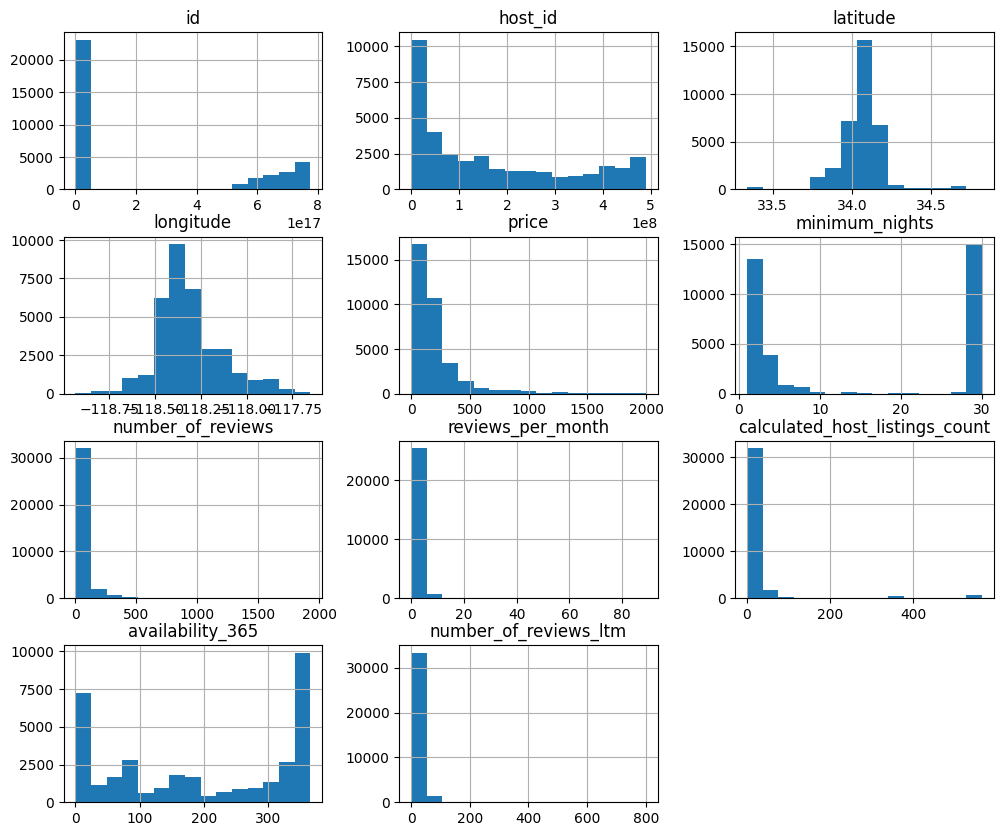

In [ ]:
# Remoção dos outliers e a criação de um novo DataFrame  

new_df = df.copy()
new_df.drop(new_df[new_df.price > 2000].index, axis=0, inplace=True)
new_df.drop(new_df[new_df.minimum_nights > 30].index, axis = 0, inplace= True)


# Remoção da coluna 'neighboruhood_group', pois está vazio.
new_df.drop('neighbourhood_group', axis=1, inplace= True)

#Plotagem do hitograma de todas as varíaveis númericas 

new_df.hist(bins=15, figsize=(12,10));

### **Q4. Qual a média dos preços de aluguel?**,

Abaixo calculamos a média da coluna `price` que é referente a os preços do alugue, e encontramos que o `valor médio do aluguel` é de U$ 279.44

In [ ]:
# ver a média da coluna `price``

(df.price.sum() / df.price.shape[0])

279.44960185963697

### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
matriz_corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
matriz_corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.015076,-0.036744,-0.021422,-0.023405,0.026461
minimum_nights,-0.015076,1.000000,-0.104460,-0.236349,0.075984,-0.008427
number_of_reviews,-0.036744,-0.104460,1.000000,0.578355,-0.109714,-0.036812
reviews_per_month,-0.021422,-0.236349,0.578355,1.000000,-0.103202,0.062535
calculated_host_listings_count,-0.023405,0.075984,-0.109714,-0.103202,1.000000,0.201197
availability_365,0.026461,-0.008427,-0.036812,0.062535,0.201197,1.000000


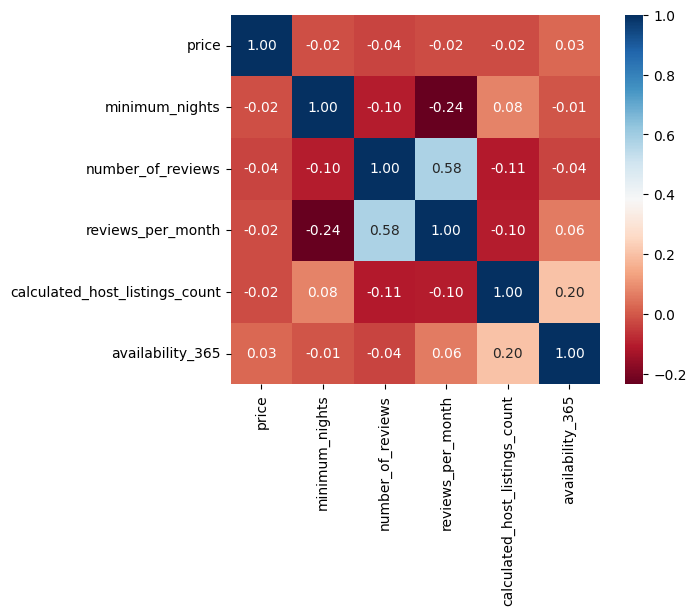

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(matriz_corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível


In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível


### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média


In [ ]:
# plotar os imóveis pela latitude-longitude


### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``

## Conclusões
